In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.ExcelFile(file_path)

Saving Exercise 34.xlsx to Exercise 34.xlsx


In [4]:
# Read Sheet1
df = data.parse('Sheet1')
display(df.head())

,Gene Name,Control_1,Control_2,Control_3,KO_1,KO_2,KO_3
0,rpoC,32144000.0,27876000.0,16709000.0,25664000.0,27452000.0,21104000.0
1,gdhZ,30783000.0,27132000.0,16343000.0,19289000.0,21274000.0,17230000.0
2,rpoB,32908000.0,29162000.0,16587000.0,26168000.0,27069000.0,20876000.0
3,putA,41257000.0,36150000.0,24990000.0,24859000.0,27692000.0,23306000.0
4,gltB,4974600.0,4334200.0,3135400.0,2797400.0,2852700.0,2198300.0


In [6]:
# Select replicate columns
numeric_cols = ['Control_1','Control_2','Control_3','KO_1','KO_2','KO_3']

# Clean NaN/inf
#clean_data = df[numeric_cols].replace([np.inf, -np.inf], np.nan).dropna()
clean_data = df[numeric_cols].dropna()

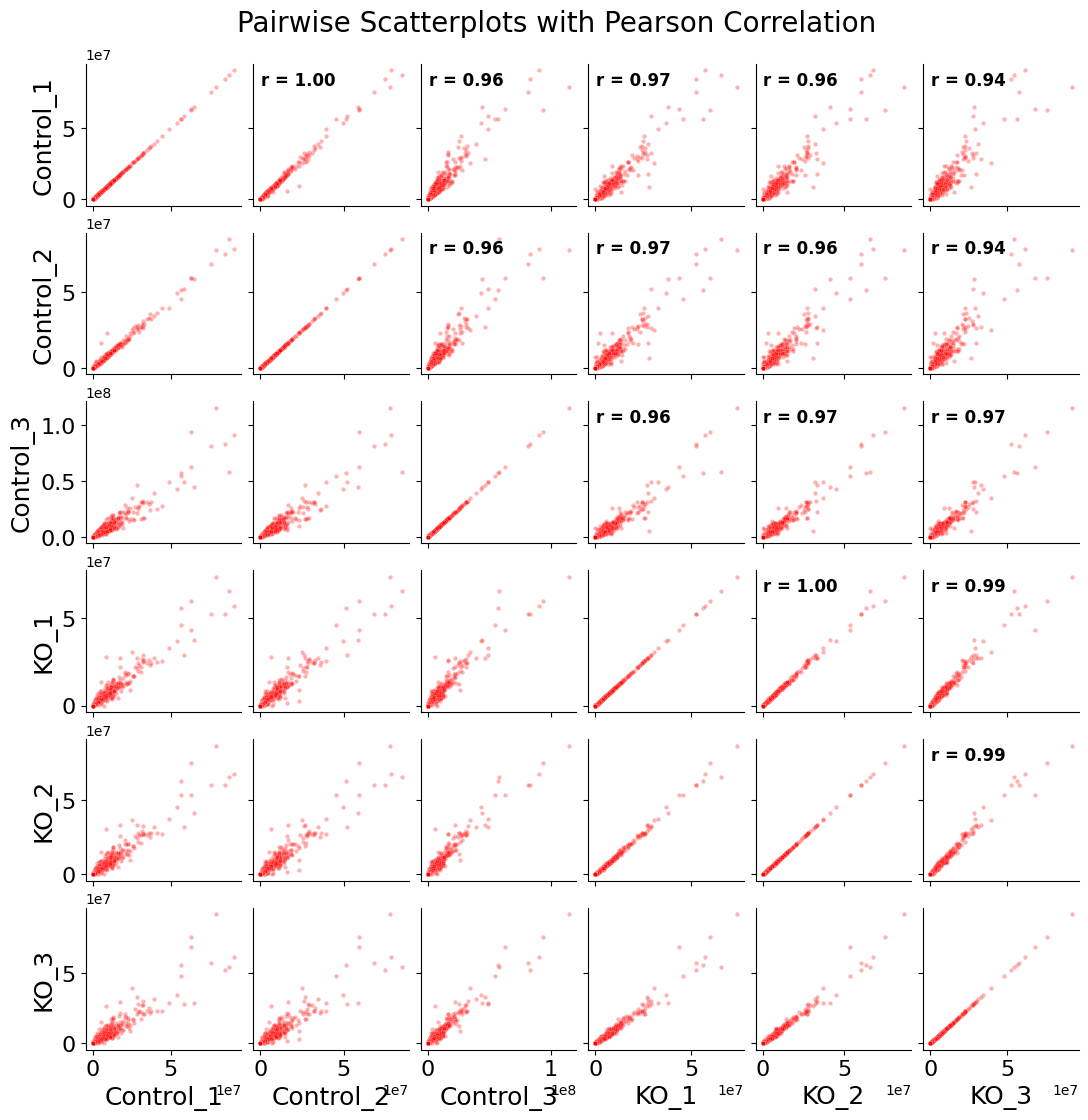

In [29]:
# STEP 5: Define correlation annotator
def corrfunc(x, y, **kws):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f"r = {r:.2f}", xy=(0.05, 0.95), xycoords=ax.transAxes,
                ha='left', va='top', fontsize=12, fontweight='bold') # Reduced font size

# STEP 6: Create pairplot
# Select control and KO columns
control_cols = ['Control_1','Control_2','Control_3']
ko_cols = ['KO_1','KO_2','KO_3']
numeric_cols = control_cols + ko_cols # Combine control and KO columns

g = sns.pairplot(clean_data, vars=numeric_cols, diag_kind=None, # Exclude histograms
                 plot_kws={'alpha':0.3, 's':10, 'color': 'red'}, # Added color parameter for scatter plots
                 height=1.8) # Further reduced height

g.map_upper(corrfunc) # Map correlation to the upper triangle
# g.map_lower(corrfunc) # Remove mapping for the lower triangle

# Increase axis label (title) font size
for ax in g.axes.flatten():
    if ax is not None:  # some upper panels can be empty
        ax.set_xlabel(ax.get_xlabel(), fontsize=18) # Reduced font size
        ax.set_ylabel(ax.get_ylabel(), fontsize=18) # Reduced font size
        ax.tick_params(axis='both', labelsize=16) # Reduced font size


plt.suptitle("Pairwise Scatterplots with Pearson Correlation",
             y=1.02, fontsize=20) # Reduced font size

# Step 10: Save the figure
png_path = 'Multi_Pro_p_den_od_2.png'
pdf_path = 'Multi_Pro_p_den_od_2.pdf'
plt.savefig(png_path, dpi=300, bbox_inches='tight')
plt.savefig(pdf_path, bbox_inches='tight')
plt.show()

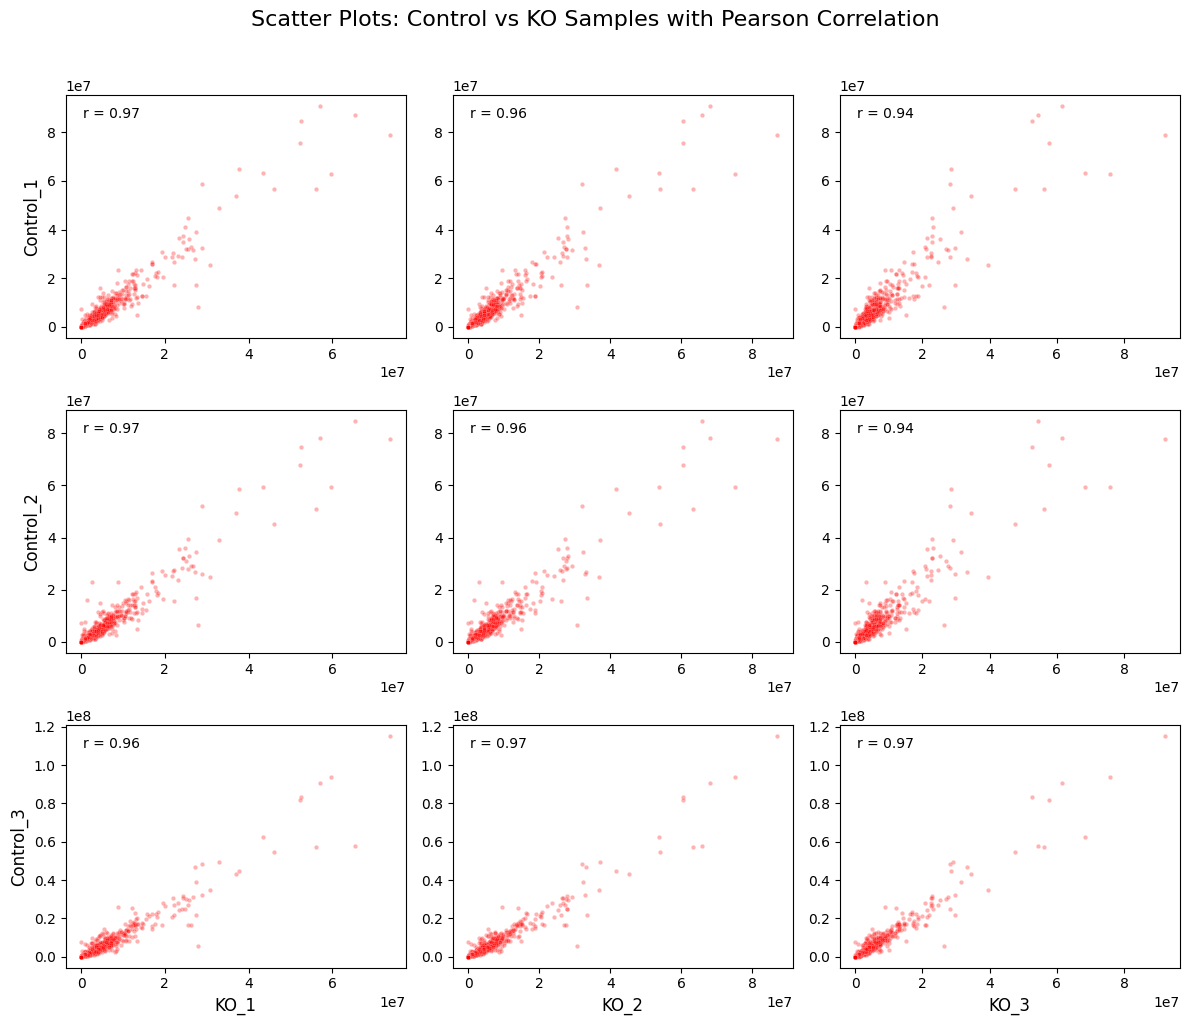

In [30]:
control_cols = ['Control_1','Control_2','Control_3']
ko_cols = ['KO_1','KO_2','KO_3']

fig, axes = plt.subplots(len(control_cols), len(ko_cols), figsize=(12, 10)) # Adjust figsize as needed

for i, control_col in enumerate(control_cols):
    for j, ko_col in enumerate(ko_cols):
        sns.scatterplot(x=clean_data[ko_col], y=clean_data[control_col], ax=axes[i, j], alpha=0.3, s=10, color='red')

        # Calculate and display the correlation coefficient
        correlation = clean_data[control_col].corr(clean_data[ko_col])
        axes[i, j].annotate(f'r = {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, verticalalignment='top')


        if i == len(control_cols) - 1: # Set xlabel only for the bottom row
            axes[i, j].set_xlabel(ko_col, fontsize=12)
        else:
            axes[i, j].set_xlabel('') # Remove xlabel for upper rows

        if j == 0: # Set ylabel only for the left column
            axes[i, j].set_ylabel(control_col, fontsize=12)
        else:
            axes[i, j].set_ylabel('') # Remove ylabel for right columns

        axes[i, j].set_title('') # Remove individual titles
        axes[i, j].tick_params(axis='both', labelsize=10)


plt.suptitle("Scatter Plots: Control vs KO Samples with Pearson Correlation", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

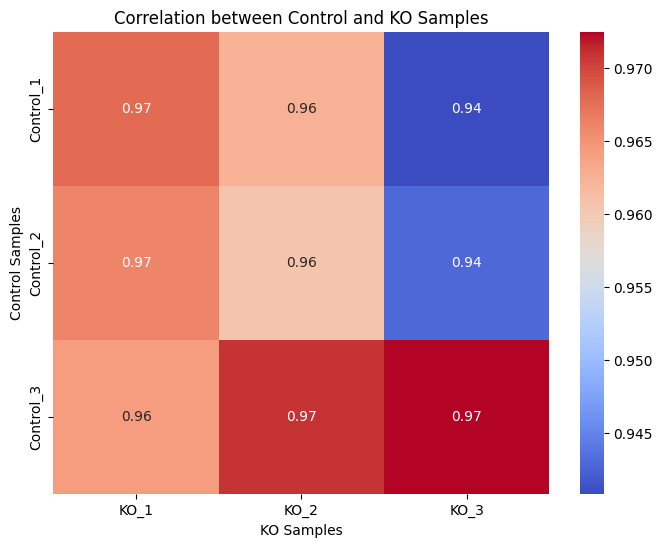

In [23]:
# Select control and KO columns
control_cols = ['Control_1','Control_2','Control_3']
ko_cols = ['KO_1','KO_2','KO_3']

# Calculate the full correlation matrix of the combined columns
full_correlation_matrix = clean_data[control_cols + ko_cols].corr()

# Select the correlation block between control and KO samples
correlation_matrix = full_correlation_matrix.loc[control_cols, ko_cols]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Control and KO Samples')
plt.xlabel('KO Samples')
plt.ylabel('Control Samples')
plt.show()

In [25]:
#Select control and KO columns
control_cols = ['Control_1','Control_2','Control_3']
ko_cols = ['KO_1','KO_2','KO_3']
#Scattered plot


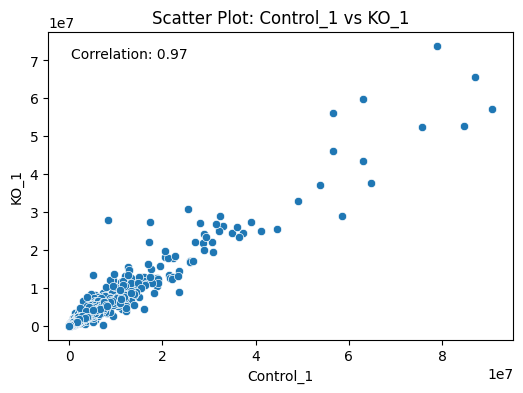

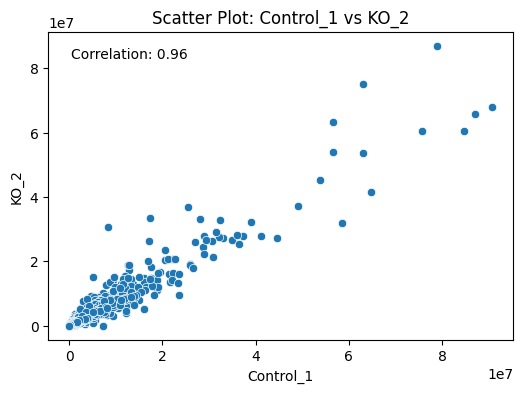

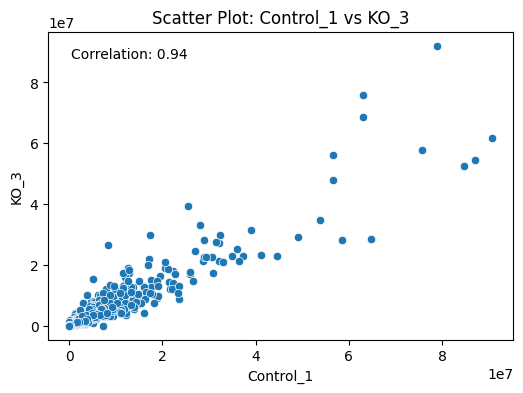

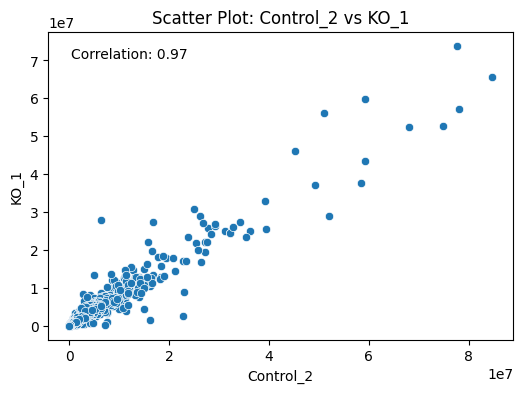

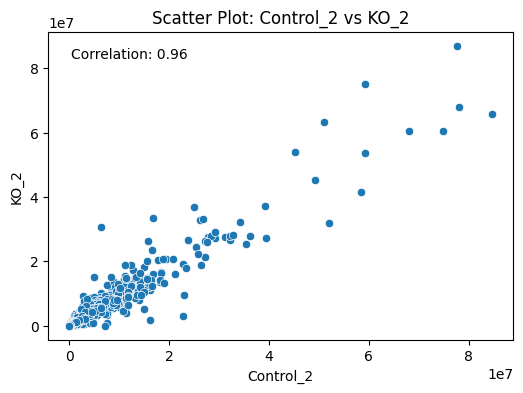

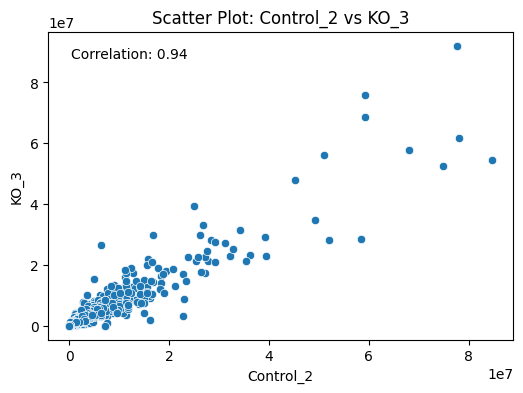

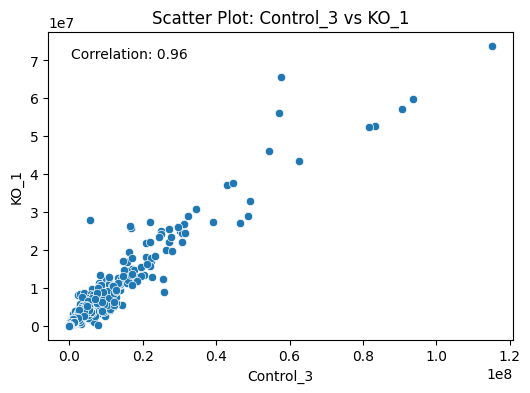

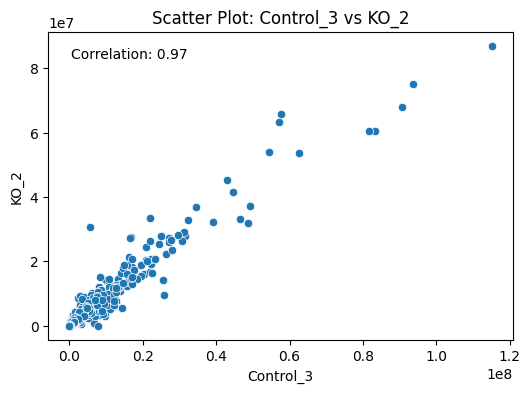

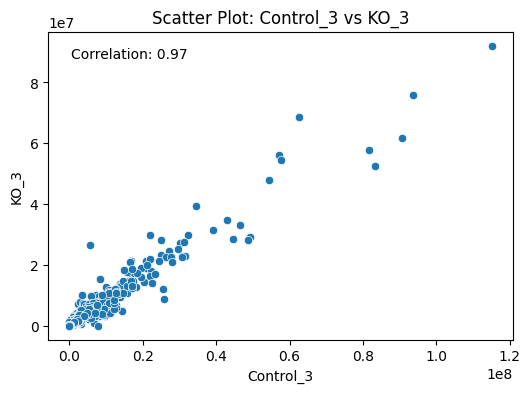

In [27]:
control_cols = ['Control_1','Control_2','Control_3']
ko_cols = ['KO_1','KO_2','KO_3']

for control_col in control_cols:
    for ko_col in ko_cols:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=clean_data[control_col], y=clean_data[ko_col])

        # Calculate and display the correlation coefficient
        correlation = clean_data[control_col].corr(clean_data[ko_col])
        plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

        plt.title(f'Scatter Plot: {control_col} vs {ko_col}')
        plt.xlabel(control_col)
        plt.ylabel(ko_col)
        plt.show()